In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# 波形信号样例

In [24]:
fs = 1000
t = np.arange(0, 1, 1 / fs)
wave = np.sin(2 * np.pi * 20 * t) * np.sin(2 * np.pi * 50 * t)

# 滑动窗口

In [25]:
from dse_vib import sliding_window_wave

t2, wave_sliced = sliding_window_wave(wave, fs, fs_slice = 20, time_duration = 0.1)

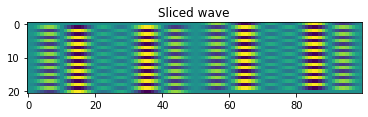

In [26]:
plt.imshow(wave_sliced)
plt.title('Sliced wave')
plt.show()

# 带通滤波

In [27]:
from dse_vib import filt_wave

wave_filted = filt_wave(wave, fs, 30, 50)
wave_sliced_filted = filt_wave(wave_sliced, fs, 30, 50)

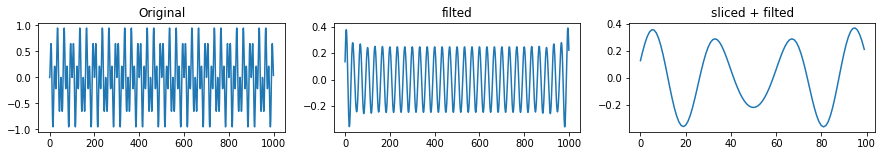

In [28]:
plt.figure(figsize = [15, 2])
plt.subplot(131)
plt.title('Original')
plt.plot(wave)
plt.subplot(132)
plt.title('filted')
plt.plot(wave_filted)
plt.subplot(133)
plt.title('sliced + filted')
plt.plot(wave_sliced_filted[5])
plt.show()

# 包络

In [29]:
from dse_vib import envelop_wave

wave_enveloped = envelop_wave(wave)
wave_sliced_enveloped = envelop_wave(wave_sliced)

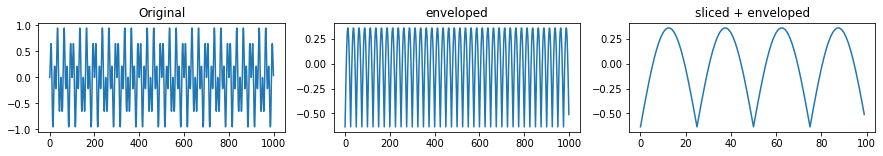

In [30]:
plt.figure(figsize = [15, 2])
plt.subplot(131)
plt.title('Original')
plt.plot(wave)
plt.subplot(132)
plt.title('enveloped')
plt.plot(wave_enveloped)
plt.subplot(133)
plt.title('sliced + enveloped')
plt.plot(wave_sliced_enveloped[5])
plt.show()

# 快速傅里叶

In [31]:
from dse_vib import fft_wave

f, spectrum = fft_wave(wave, fs)
f2, tf_spectrum = fft_wave(wave_sliced, fs)

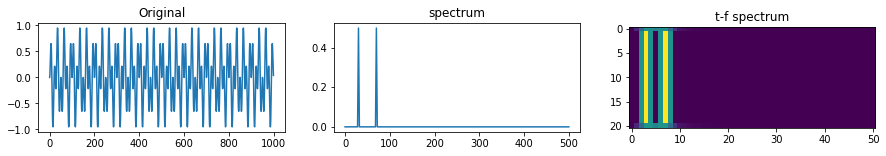

In [32]:
plt.figure(figsize = [15, 2])
plt.subplot(131)
plt.title('Original')
plt.plot(wave)
plt.subplot(132)
plt.title('spectrum')
plt.plot(f, abs(spectrum))
plt.subplot(133)
plt.title('t-f spectrum')
plt.imshow(abs(tf_spectrum))
plt.show()

# 短时傅里叶变换与逆短时傅里叶变换

In [35]:
from dse_vib import stft_wave
from dse_vib import istft_spec

t, f, spectrum = stft_wave(wave, fs, fs_slice = 20, time_duration = 0.1)
wave_recon = istft_spec(spectrum, fs, fs_slice = 20, time_duration = 0.1)

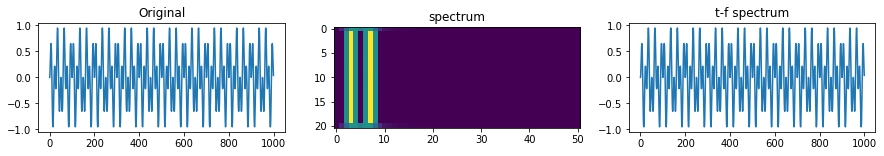

In [36]:
plt.figure(figsize = [15, 2])
plt.subplot(131)
plt.title('Original')
plt.plot(wave)
plt.subplot(132)
plt.title('spectrum')
plt.imshow(abs(spectrum))
plt.subplot(133)
plt.title('t-f spectrum')
plt.plot(wave_recon)
plt.show()

# 时域特征

In [37]:
from dse_vib import time_domain_features_wave

tdf = time_domain_features_wave(wave)
tdf2 = time_domain_features_wave(wave_sliced)

In [38]:
pd.DataFrame(tdf, index = [0])

,mean,absolute_mean,variance,standard_deviation,peak,root_mean_square,sqrt_amplitude,kurtosis,skewness,crest_factor,peak2peak,average_energy,margin_factor,shape_factor,impulse_factor
0,1.354472e-17,0.402221,0.25,0.5,0.951057,0.5,0.317515,2.25,4.956036e-16,1.902113,1.902113,0.25,2.995315,1.243098,2.364512


In [39]:
pd.DataFrame(tdf2)

,mean,absolute_mean,variance,standard_deviation,peak,root_mean_square,sqrt_amplitude,kurtosis,skewness,crest_factor,peak2peak,average_energy,margin_factor,shape_factor,impulse_factor
0,-1.490116e-10,0.201111,0.125,0.353553,0.951057,0.353553,0.079379,4.499999,1.073674e-08,2.689994,1.902113,0.125,11.981259,1.758006,4.729024
1,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512
2,-1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,-5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512
3,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512
4,-1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,-5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512
5,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512
6,-1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,-5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512
7,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512
8,-1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,-5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512
9,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512


# 阶次幅值提取

In [41]:
from dse_vib import order_amplitude_extraction_spec

base_frequency = np.linspace(0, 50, 21) #Fake
orders = [1,2,3,4,5]
order_amplitude_extraction_spec(t, f, spectrum, base_frequency, orders)

,1x,2x,3x,4x,5x
0.00,2.232385e-17,2.232385e-17,2.232385e-17,2.232385e-17,2.232385e-17
0.05,2.746042e-16,2.746042e-16,2.746042e-16,2.500000e-01,2.500000e-01
0.10,3.413028e-16,2.500000e-01,2.500000e-01,5.000000e-01,5.000000e-01
0.15,5.901812e-16,2.500000e-01,5.000000e-01,5.000000e-01,5.000000e-01
0.20,2.500000e-01,5.000000e-01,5.000000e-01,5.000000e-01,2.500000e-01
0.25,2.500000e-01,5.000000e-01,5.000000e-01,2.500000e-01,5.000000e-01
0.30,2.500000e-01,5.000000e-01,2.500000e-01,5.000000e-01,5.000000e-01
0.35,2.500000e-01,5.000000e-01,2.500000e-01,5.000000e-01,2.500000e-01
0.40,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,2.389873e-15
0.45,5.000000e-01,2.500000e-01,5.000000e-01,2.500000e-01,5.451387e-16


# 频域特征

In [42]:
from dse_vib import frequency_domain_features_spec

fdf = frequency_domain_features_spec(f, spectrum)

In [43]:
pd.DataFrame(fdf)

,frequency_centre,mean_frequency,rms_frequency,se_of_raw_signal
0,55.879249,250.0,64.875151,3.39585
1,50.000000,250.0,54.313902,2.50000
2,50.000000,250.0,54.313902,2.50000
3,50.000000,250.0,54.313902,2.50000
4,50.000000,250.0,54.313902,2.50000
5,50.000000,250.0,54.313902,2.50000
6,50.000000,250.0,54.313902,2.50000
7,50.000000,250.0,54.313902,2.50000
8,50.000000,250.0,54.313902,2.50000
9,50.000000,250.0,54.313902,2.50000


# 组合操作输出时频特征

In [45]:
t2, wave_sliced = sliding_window_wave(wave, fs, fs_slice = 20, time_duration = 0.1)
f2, tf_spectrum = fft_wave(wave_sliced, fs)

tdf = time_domain_features_wave(wave_sliced)
fdf = frequency_domain_features_spec(f2, tf_spectrum)
all_features = {**tdf, **fdf}
pd.DataFrame(all_features, index = t2)

,mean,absolute_mean,variance,standard_deviation,peak,root_mean_square,sqrt_amplitude,kurtosis,skewness,crest_factor,peak2peak,average_energy,margin_factor,shape_factor,impulse_factor,frequency_centre,mean_frequency,rms_frequency,se_of_raw_signal
0.00,-1.490116e-10,0.201111,0.125,0.353553,0.951057,0.353553,0.079379,4.499999,1.073674e-08,2.689994,1.902113,0.125,11.981259,1.758006,4.729024,55.957749,250.0,65.032777,3.407308
0.05,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
0.10,-1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,-5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
0.15,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
0.20,-1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,-5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
0.25,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
0.30,-1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,-5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
0.35,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
0.40,-1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,-5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
0.45,1.490116e-10,0.402221,0.250,0.500000,0.951057,0.500000,0.317515,2.250000,5.740731e-09,1.902113,1.902113,0.250,2.995314,1.243098,2.364512,50.015332,250.0,54.396203,2.533925
